This notebook provides fill rates regarding crunchbase binary data that was used in modeling and feature importances when they were used in initial modeling steps.

In [19]:
import pandas as pd
import numpy as np

# Import BigQuery library
from google.cloud import bigquery

# Create a BigQuery client
client = bigquery.Client()

import pandas as pd
import numpy as np

# Import BigQuery library
from google.cloud import bigquery

# Create a BigQuery client
client = bigquery.Client()

query1 = """
  SELECT
  *
  FROM `sandbox-b1.safe_prod_exploration.crunchbase_binary` data
"""

query_job = client.query(query1)

df = query_job.to_dataframe()

In [3]:
import pandas as pd

# Example: Calculate fill rate per column
fill_rates = df.notnull().mean() * 100  # in percentage

# Binning columns based on fill rate
bins = {
    '>10%': (fill_rates > 10).sum(),
    '10–30%': ((fill_rates >= 10) & (fill_rates <= 30)).sum(),
    '>40–60%': ((fill_rates > 40) & (fill_rates <= 60)).sum(),
    '>60%': (fill_rates > 60).sum()
}

# Convert to DataFrame for better display
bin_df = pd.DataFrame(list(bins.items()), columns=['Fill Rate Range', 'Column Count'])

print(bin_df)


  Fill Rate Range  Column Count
0            >10%            76
1          10–30%             0
2         >40–60%             0
3            >60%            76


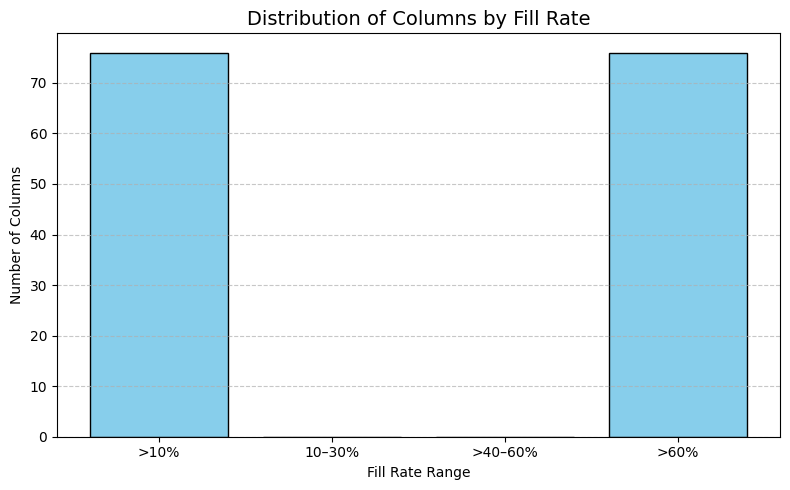

In [4]:
# 3. Create DataFrame for plotting
import pandas as pd
import matplotlib.pyplot as plt
bin_df = pd.DataFrame(list(bins.items()), columns=['Fill Rate Range', 'Column Count'])

# 4. Plot
plt.figure(figsize=(8, 5))
plt.bar(bin_df['Fill Rate Range'], bin_df['Column Count'], color='skyblue', edgecolor='black')
plt.title('Distribution of Columns by Fill Rate', fontsize=14)
plt.xlabel('Fill Rate Range')
plt.ylabel('Number of Columns')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

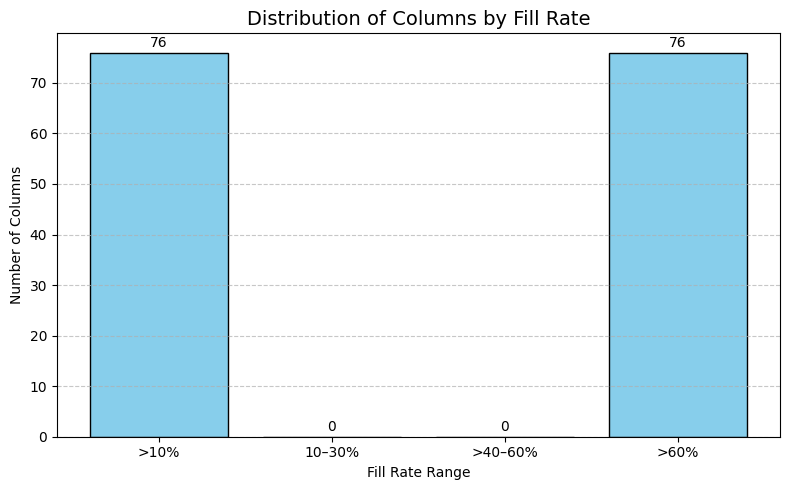

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Calculate fill rates per column
fill_rates = df.notnull().mean() * 100  # in percentage

# 2. Bin columns by fill rate ranges
bins = {
    '>10%': (fill_rates > 10).sum(),
    '10–30%': ((fill_rates >= 10) & (fill_rates <= 30)).sum(),
    '>40–60%': ((fill_rates > 40) & (fill_rates <= 60)).sum(),
    '>60%': (fill_rates > 60).sum()
}

# 3. Create DataFrame for plotting
bin_df = pd.DataFrame(list(bins.items()), columns=['Fill Rate Range', 'Column Count'])

# 4. Plot with annotations
plt.figure(figsize=(8, 5))
bars = plt.bar(bin_df['Fill Rate Range'], bin_df['Column Count'], color='skyblue', edgecolor='black')

plt.title('Distribution of Columns by Fill Rate', fontsize=14)
plt.xlabel('Fill Rate Range')
plt.ylabel('Number of Columns')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# 1. Calculate fill rates
fill_rates = df.notnull().mean() * 100

# 2. Filter columns with >40% fill rate
high_fill_cols = fill_rates[fill_rates > 40].index

# 3. Separate into numerical and binary categorical
numerical_cols = []
binary_categorical_cols = []

for col in high_fill_cols:
    unique_vals = df[col].dropna().unique()

    # Numerical if dtype is number and > 2 unique values
    if pd.api.types.is_numeric_dtype(df[col]):
        if len(unique_vals) > 2:
            numerical_cols.append(col)
        elif len(unique_vals) == 2:
            binary_categorical_cols.append(col)
    else:
        # Binary categorical (non-numeric) with only 2 unique values
        if len(unique_vals) == 2:
            binary_categorical_cols.append(col)

# 4. Display results
print("Numerical Columns with >40% Fill Rate:")
print(numerical_cols)

print("\nBinary Categorical Columns with >40% Fill Rate:")
print(binary_categorical_cols)


Numerical Columns with >40% Fill Rate:
['bq_confidence_score']

Binary Categorical Columns with >40% Fill Rate:
['identifier_image_id', 'acquirer_identifier_entity_def_id', 'acquirer_identifier_uuid', 'acquirer_identifier_permalink', 'acquirer_identifier_value', 'acquirer_identifier_image_id', 'aliases', 'categories_entity_def_id', 'categories_uuid', 'categories_permalink', 'categories_value', 'categories_image_id', 'category_groups_entity_def_id', 'category_groups_uuid', 'category_groups_permalink', 'category_groups_value', 'category_groups_image_id', 'closed_on_value', 'closed_on_precision', 'company_type', 'contact_email', 'delisted_on_value', 'delisted_on_precision', 'demo_days', 'description', 'equity_funding_total_value', 'equity_funding_total_currency', 'equity_funding_total_value_usd', 'exited_on_value', 'exited_on_precision', 'facebook', 'founded_on_value', 'founded_on_precision', 'founder_identifiers_entity_def_id', 'founder_identifiers_uuid', 'founder_identifiers_permalink',

In [11]:
fill_rates = df.notnull().mean() * 100
fill_rates

,0
identifier_entity_def_id,100.000000
identifier_uuid,100.000000
identifier_permalink,100.000000
identifier_value,100.000000
identifier_image_id,100.000000
...,...
linkedin,100.000000
listed_stock_symbol,100.000000
location_group_identifiers_entity_def_id,100.000000
location_group_identifiers_uuid,100.000000


In [14]:
# 3. Get fill rates for categorical columns
cat_fill_rates = fill_rates[binary_categorical_cols]

# 4. Sort and select top 20
top20_cat = cat_fill_rates.sort_values(ascending=False).head(20)
top20_cat

,0
identifier_image_id,100.0
funds_total_currency,100.0
investor_identifiers_permalink,100.0
investor_identifiers_uuid,100.0
investor_identifiers_entity_def_id,100.0
image_url,100.0
hub_tags,100.0
funds_total_value_usd,100.0
funds_total_value,100.0
acquirer_identifier_entity_def_id,100.0


In [6]:
import pandas as pd

# 1. Calculate fill rates
fill_rates = df.notnull().mean() * 100

# 2. Filter columns with >40% fill rate
high_fill_cols = fill_rates[fill_rates > 40].index

# 3. Classify as numerical or categorical
numerical_cols = []
categorical_cols = []

for col in high_fill_cols:
    if pd.api.types.is_numeric_dtype(df[col]):
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

# 4. Output
print("Numerical Columns with >40% Fill Rate:")
print(numerical_cols)

print("\nCategorical Columns with >40% Fill Rate:")
print(categorical_cols)


Numerical Columns with >40% Fill Rate:
['identifier_entity_def_id', 'identifier_uuid', 'identifier_permalink', 'identifier_value', 'identifier_image_id', 'acquirer_identifier_entity_def_id', 'acquirer_identifier_uuid', 'acquirer_identifier_permalink', 'acquirer_identifier_value', 'acquirer_identifier_image_id', 'aliases', 'categories_entity_def_id', 'categories_uuid', 'categories_permalink', 'categories_value', 'categories_image_id', 'category_groups_entity_def_id', 'category_groups_uuid', 'category_groups_permalink', 'category_groups_value', 'category_groups_image_id', 'closed_on_value', 'closed_on_precision', 'company_type', 'contact_email', 'created_at', 'delisted_on_value', 'delisted_on_precision', 'demo_days', 'description', 'equity_funding_total_value', 'equity_funding_total_currency', 'equity_funding_total_value_usd', 'exited_on_value', 'exited_on_precision', 'facebook', 'founded_on_value', 'founded_on_precision', 'founder_identifiers_entity_def_id', 'founder_identifiers_uuid', 

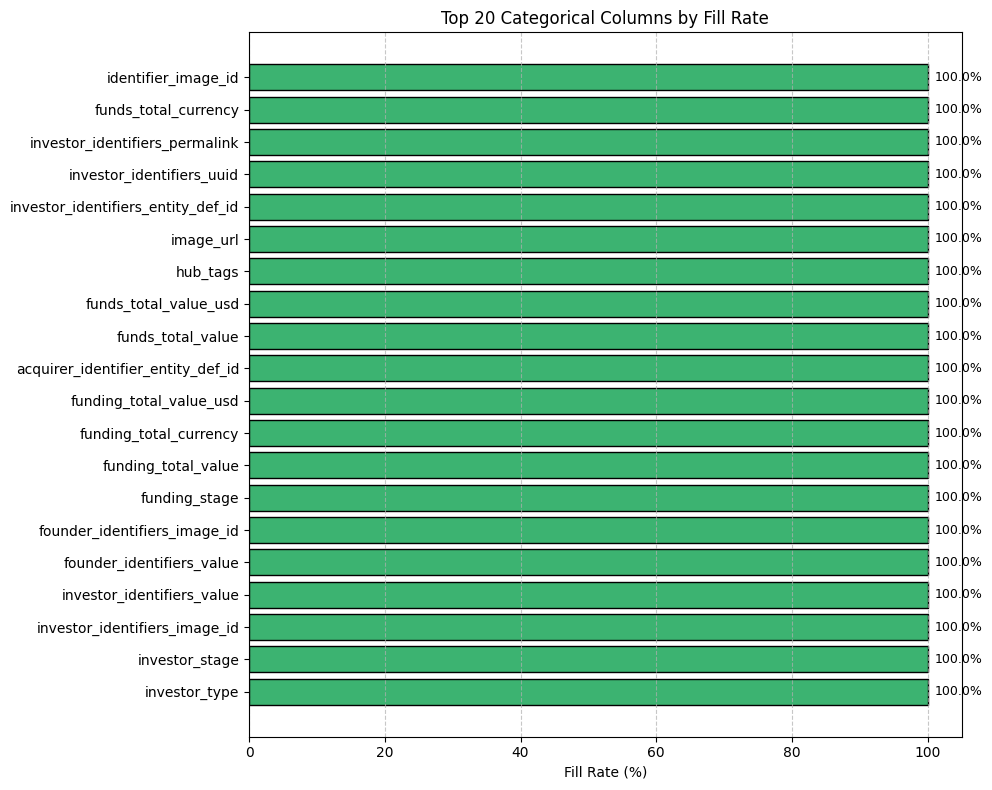

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Calculate fill rates
fill_rates = df.notnull().mean() * 100

# 2. Select categorical columns only
categorical_cols = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col])]

# 3. Get fill rates for categorical columns
cat_fill_rates = fill_rates[binary_categorical_cols]

# 4. Sort and select top 20
top20_cat = cat_fill_rates.sort_values(ascending=False).head(20)

# 5. Plot horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(top20_cat.index, top20_cat.values, color='mediumseagreen', edgecolor='black')

plt.xlabel('Fill Rate (%)')
plt.title('Top 20 Categorical Columns by Fill Rate')
plt.gca().invert_yaxis()  # Highest bar at top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 6. Add annotations (values on bars)
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np

# Import BigQuery library
from google.cloud import bigquery

# Create a BigQuery client
client = bigquery.Client()

query2 = """
  SELECT
  *
  FROM `crunchbase.crunchbase_data_ownerships_2025-04-09` data
"""

query_job = client.query(query2)

df = query_job.to_dataframe()

In [17]:
df

,identifier_entity_def_id,identifier_uuid,identifier_permalink,identifier_value,identifier_image_id,created_at,name,ownee_identifier_entity_def_id,ownee_identifier_uuid,ownee_identifier_permalink,ownee_identifier_value,ownee_identifier_image_id,owner_identifier_entity_def_id,owner_identifier_uuid,owner_identifier_permalink,owner_identifier_value,owner_identifier_image_id,ownership_type,updated_at
0,ownership,4818cc9e-d657-4678-982c-0a46fc700975,None,None,None,2018-01-22 09:05:51+00:00,None,None,None,None,None,None,organization,8a966883-e9db-5c4a-42e6-ae5309e709db,snow-corporation,Snow Corporation,mc67dw5wdn3wcdbkte6a,affiliated_company,2018-02-13 00:18:14+00:00
1,ownership,e3874118-91fb-469f-9b90-06ab70f829d8,1000-startup-digital-owns-atourin--e3874118,Gerakan Nasional 1000 Startup Digital owns Ato...,None,2022-03-28 05:12:25+00:00,Gerakan Nasional 1000 Startup Digital owns Ato...,organization,368aaa18-4fbc-43dc-a61c-28642230768e,atourin,Atourin,spc724x0iyr4mrptwxki,organization,bc1bf341-781f-4563-9865-125a9cd329e1,1000-startup-digital,Gerakan Nasional 1000 Startup Digital,rt6xu8glrt15f4vzttr7,affiliated_company,2022-03-28 05:12:25+00:00
2,ownership,c510b406-db6e-4938-86ca-e85ea72bc7b1,1000-startup-digital-owns-bizhare--c510b406,Gerakan Nasional 1000 Startup Digital owns Biz...,None,2022-03-27 16:52:06+00:00,Gerakan Nasional 1000 Startup Digital owns Biz...,organization,480327fb-09be-423c-83ec-3b491b68fe89,bizhare,Bizhare,qbazlkk8ygadjpjpytff,organization,bc1bf341-781f-4563-9865-125a9cd329e1,1000-startup-digital,Gerakan Nasional 1000 Startup Digital,rt6xu8glrt15f4vzttr7,affiliated_company,2022-03-27 16:52:06+00:00
3,ownership,5afd9606-3157-45d1-90cf-193da9b0f790,1000-startup-digital-owns-botika--5afd9606,Gerakan Nasional 1000 Startup Digital owns Botika,None,2022-03-27 16:54:34+00:00,Gerakan Nasional 1000 Startup Digital owns Botika,organization,a236ee2e-f938-f8a3-4faf-0e242d8f635a,botika,Botika,v1484718008/lkwnjlowtcqrbqfer79b.jpg,organization,bc1bf341-781f-4563-9865-125a9cd329e1,1000-startup-digital,Gerakan Nasional 1000 Startup Digital,rt6xu8glrt15f4vzttr7,affiliated_company,2022-03-27 16:54:34+00:00
4,ownership,f6d62136-abf4-4fae-8e07-907ae15028ca,1000-startup-digital-owns-invita--f6d62136,Gerakan Nasional 1000 Startup Digital owns Invita,None,2022-03-28 05:12:25+00:00,Gerakan Nasional 1000 Startup Digital owns Invita,organization,d9ca0922-882c-4df1-b918-b4704254040e,invita,Invita,bdnmagjijnga3xlphsuf,organization,bc1bf341-781f-4563-9865-125a9cd329e1,1000-startup-digital,Gerakan Nasional 1000 Startup Digital,rt6xu8glrt15f4vzttr7,affiliated_company,2022-03-28 05:12:25+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28253,ownership,a9be1b85-ac6f-47e8-9b30-77ad1b663b89,zyrex-holdings-owns-rz-technology--a9be1b85,Zyrex Holdings owns RZ Technology,None,2025-01-07 15:16:45+00:00,Zyrex Holdings owns RZ Technology,organization,794502e9-f989-4eb6-931c-52ed3916562d,rz-technology,RZ Technology,990e42b4fcc94f13a9bfcc22c5b0b674,organization,a9f055ff-0724-4993-aa0d-9f701c4fa6d1,zyrex-holdings,Zyrex Holdings,bc6ee2b9674f4bc3921772e4226403d5,subsidiary,2025-01-07 15:16:45+00:00
28254,ownership,c37dddd8-45fb-4de1-b03b-ffffe3f57aa1,zyrex-holdings-owns-t-rex-capital-b4a7--c37dddd8,Zyrex Holdings owns T-Rex Capital,None,2025-01-07 14:32:38+00:00,Zyrex Holdings owns T-Rex Capital,organization,a897be7c-d062-4a01-979a-b53b651bb4a7,t-rex-capital-b4a7,T-Rex Capital,8ccaa50bff5e47d49f497537b00e8371,organization,a9f055ff-0724-4993-aa0d-9f701c4fa6d1,zyrex-holdings,Zyrex Holdings,bc6ee2b9674f4bc3921772e4226403d5,subsidiary,2025-01-07 14:32:38+00:00
28255,ownership,e213593f-c57c-4c42-85b5-bfd6d9ccb7f1,zz-capital-owns-zz-capital-international--e213...,ZZ Capital owns ZZ Capital International,None,2019-05-21 02:34:17+00:00,ZZ Capital owns ZZ Capital International,organization,243aae8a-2ead-c390-f163-c00ec4246aaa,zz-capital-international,ZZ Capital International,v1499941661/ejrdfmy8a3dkjtzlizrr.png,organization,c09150

In [20]:
# Convert to float/decimal in pandas
df['bq_confidence_score'] = pd.to_numeric(df['bq_confidence_score'], errors='coerce')


In [21]:
df = df.dropna(subset=['bq_confidence_score'])


In [22]:
# Drop non-numeric/binary columns if needed
X = df.drop(columns=['bq_confidence_score'])
y = df['bq_confidence_score']

# Optional: fill missing with 0 (binary assumption)
X = X.fillna(0)

# Encode non-binary categorical strings (if accidentally present)
X = pd.get_dummies(X)
X

,identifier_entity_def_id,identifier_uuid,identifier_permalink,identifier_value,identifier_image_id,acquirer_identifier_entity_def_id,acquirer_identifier_uuid,acquirer_identifier_permalink,acquirer_identifier_value,acquirer_identifier_image_id,...,last_funding_total_value,last_funding_total_currency,last_funding_total_value_usd,last_funding_type,layout_id,legal_name,linkedin,listed_stock_symbol,location_group_identifiers_entity_def_id,location_group_identifiers_uuid
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,1
2,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
3,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
4,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263267,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
263268,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
263269,1,1,1,1,1,0,0,0,0,0,...,1,1,1,1,0,1,1,0,1,1
263270,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

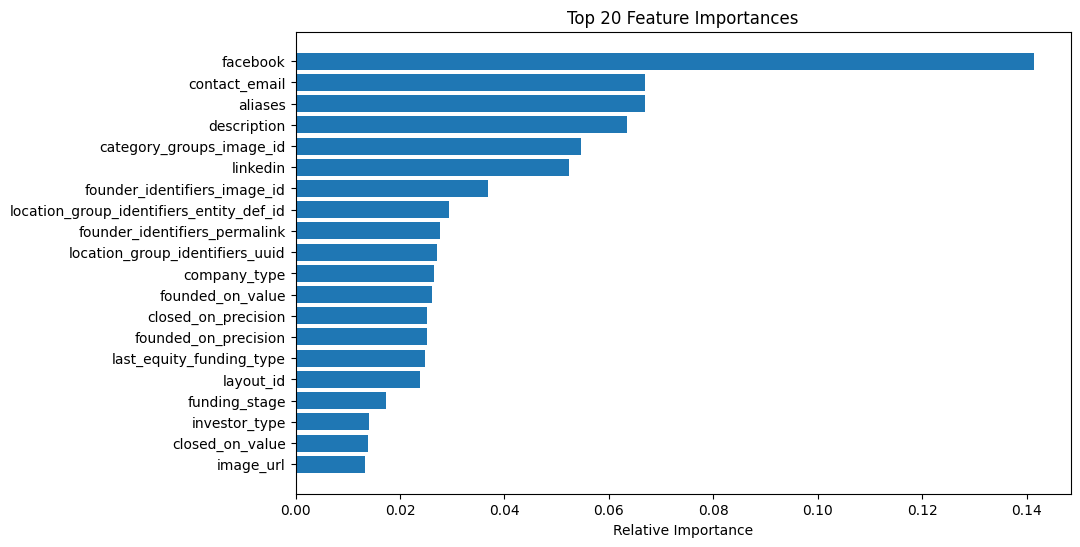

In [24]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns

# Top 20 features
indices = importances.argsort()[-20:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Top 20 Feature Importances')
plt.show()


In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 RMSE: {rmse:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📈 R2 Score: {r2:.4f}")


📊 RMSE: 12.6194
📉 MAE: 10.4349
📈 R2 Score: 0.0436


In [26]:
y_pred

array([87.35008649, 97.80035807, 88.83852227, ..., 94.42860174,
       87.98987382, 89.66385175])